# Linear Regression Project

# Pedicting the medical insurance costo of a person

   In this project we will build a linear regression model to predict the insurance prima for an individual based on different factors.

   Start with your exploratory data analysis and data transformation if needed.

   Build your baseline model, measure your results and optimize your model.

   Finally, create a pipeline for your final model and put it in you app.py file.




This dataset has 7 columns. We will use the 'charges' column as the target variable because we want to create a model that predicts the cost of the insurance based on different factors.

Columns:
- age: age of primary beneficiary
- sex: insurance contractor gender, female or male
- bmi: Body mass index
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

# Step 0 - Import Library

In [156]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
#!pip install seaborn
import seaborn as sns
import seaborn as sb
#!pip install plotly
import plotly.graph_objects as go
#!pip install folium
#!pip install statsmodels
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import plotly.express as px
import pickle
import statsmodels.api as sm

# Setp 1 - Import and Basic Explored Data

In [157]:
#step 0 Load dataset

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df_raw=pd.read_csv(url)
df_raw.describe()
# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [158]:
#step 1 Basic exploration
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [159]:
pd.get_dummies(df_raw,drop_first=True)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [160]:
# ya se transformó con el get_dummies.
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [161]:
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
347,46,male,33.345,1,no,northeast,8334.45755
163,32,female,29.800,2,no,southwest,5152.13400
786,60,male,36.955,0,no,northeast,12741.16745
1322,62,male,38.830,0,no,southeast,12981.34570
972,22,female,20.235,0,no,northwest,2527.81865
334,43,female,35.720,2,no,northeast,19144.57652
854,49,female,23.845,3,yes,northeast,24106.91255
1079,63,male,33.660,3,no,southeast,15161.53440
242,55,female,26.800,1,no,southwest,35160.13457
492,18,female,25.080,0,no,northeast,2196.47320


In [162]:
df_raw.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [163]:
len(df_raw)

1338

In [164]:
df_raw.shape

(1338, 7)

# Step 2 make the transformation

para que el dataset se adecue para pasarlo a una matriz de solo números.
tenemos 3 variables categóricas
En un dataset heterogeno las var categoricas van a ser las estratas.

Variables numéricas

Chequear si variable dependiente está balanceada o no.

In [165]:
df_raw.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [166]:
df_raw.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [167]:
df_raw.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [168]:
df_raw.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [169]:
df_raw[df_raw.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [170]:
df_raw.duplicated().any()

True

In [171]:
df_raw=df_raw.drop_duplicates().reset_index(drop= True)

In [172]:
df_raw.duplicated().any()

False

<AxesSubplot:>

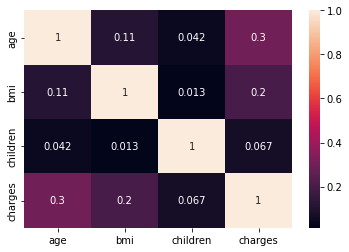

In [173]:
sb.heatmap(df_raw.corr(), annot=True)

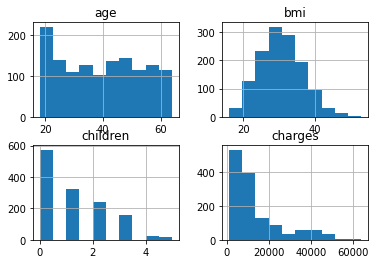

In [174]:
df_raw.hist()

plt.show()

# analizamos variable target

<AxesSubplot:>

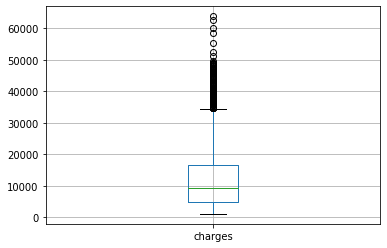

In [175]:
df_raw.boxplot(column='charges')

<AxesSubplot:>

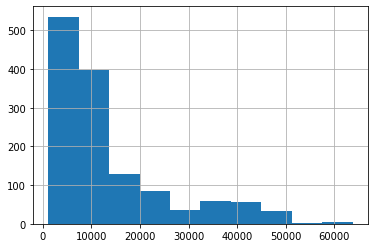

In [176]:

df_raw['charges'].hist()

In [177]:
df_raw['charges_log'] = np.log10(df_raw['charges']+10**(-6))

df_raw

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,4.227499
1,18,male,33.770,1,no,southeast,1725.55230,3.236928
2,28,male,33.000,3,no,southeast,4449.46200,3.648308
3,33,male,22.705,0,no,northwest,21984.47061,4.342116
4,32,male,28.880,0,no,northwest,3866.85520,3.587358
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,4.025328
1333,18,female,31.920,0,no,northeast,2205.98080,3.343602
1334,18,female,36.850,0,no,southeast,1629.83350,3.212143
1335,21,female,25.800,0,no,southwest,2007.94500,3.302752


<AxesSubplot:>

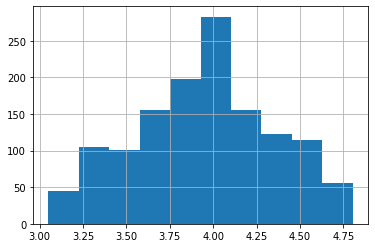

In [178]:
df_raw['charges_log'].hist()
# Para sacar la métrica real del error tendríamos que realizar la inversa de la transformación.

In [179]:
fig = px.box(df_raw, y="charges")
fig.show()

In [180]:
# charges según sexo
fig = px.box(df_raw, x='sex', y='charges')
fig.show()

In [181]:
# charges según region
fig = px.box(df_raw, x="region", y="charges")
fig.show()

In [182]:
# charges según fumadores
fig = px.box(df_raw, x="smoker", y="charges")
fig.show()

In [183]:
# charges según si tienen hijos
fig = px.box(df_raw, x="children", y="charges")
fig.show()

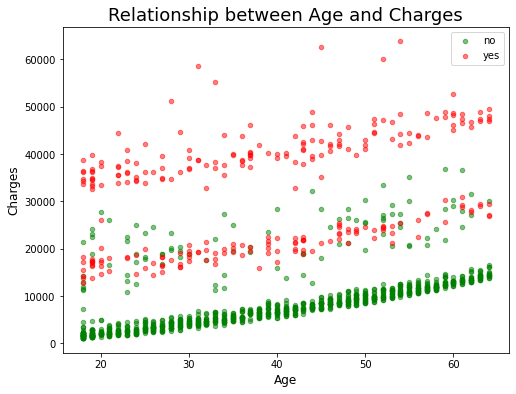

In [184]:
# scatter plot charges según edad, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='age', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Age and Charges', size=18)
plt.xlabel('Age', size=12)
plt.ylabel('Charges', size=12);


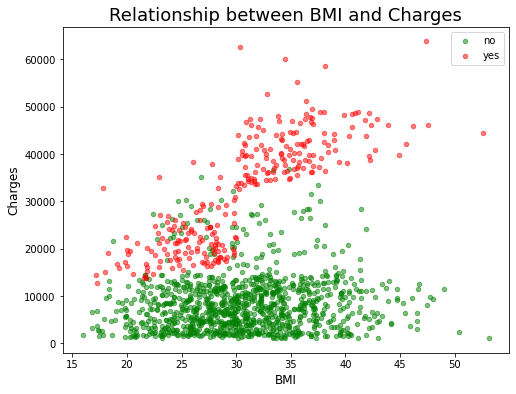

In [185]:
# scatter plot charges según BMI, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='bmi', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between BMI and Charges', size=18)
plt.xlabel('BMI', size=12)
plt.ylabel('Charges', size=12);

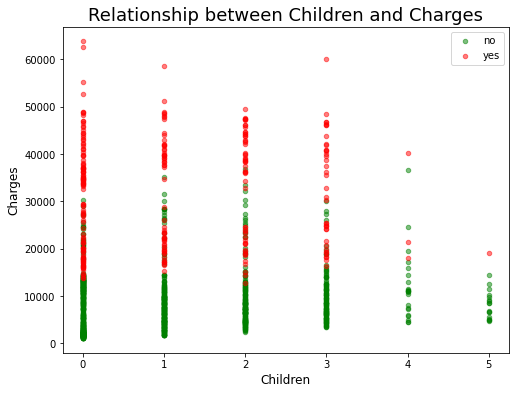

In [186]:
# scatter plot charges según children, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='children', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='children', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Children and Charges', size=18)
plt.xlabel('Children', size=12)
plt.ylabel('Charges', size=12);

Los fumadores siempre pagan más.
Parecería haber tres "tipos" de seguros.
No parecería existir relación con la región.

In [187]:
X=df_raw.drop(columns=['charges','charges_log'])
y=df_raw['charges']

In [188]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [189]:
# se hizo con get_dummies, más práctico
#encoding codifcar el valor de las var categóricas
#rules: columnas de la clase x = categorías -1

"""df_raw['sex']=df_raw['sex'].apply(lambda x:1 if x=='female'  else 0)
df_raw['smoker']=df_raw['smoker'].apply(lambda x:1 if x=="yes" else 0)
df_raw['region_sw']=df_raw['region'].apply(lambda x:1 if x=="southwest" else 0)
df_raw['region_nw']=df_raw['region'].apply(lambda x:1 if x=="northwest" else 0)
df_raw['region_ne']=df_raw['region'].apply(lambda x:1 if x=="northeast" else 0)
df_raw=df_raw.drop(['sex','smoker','region'],axis=1)
df_interim=df_raw.copy()"""







'df_raw[\'sex\']=df_raw[\'sex\'].apply(lambda x:1 if x==\'female\'  else 0)\ndf_raw[\'smoker\']=df_raw[\'smoker\'].apply(lambda x:1 if x=="yes" else 0)\ndf_raw[\'region_sw\']=df_raw[\'region\'].apply(lambda x:1 if x=="southwest" else 0)\ndf_raw[\'region_nw\']=df_raw[\'region\'].apply(lambda x:1 if x=="northwest" else 0)\ndf_raw[\'region_ne\']=df_raw[\'region\'].apply(lambda x:1 if x=="northeast" else 0)\ndf_raw=df_raw.drop([\'sex\',\'smoker\',\'region\'],axis=1)\ndf_interim=df_raw.copy()'

In [190]:
X =pd.get_dummies(X,drop_first=True)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1332,50,30.970,3,1,0,1,0,0
1333,18,31.920,0,0,0,0,0,0
1334,18,36.850,0,0,0,0,1,0
1335,21,25.800,0,0,0,0,0,1


<AxesSubplot:>

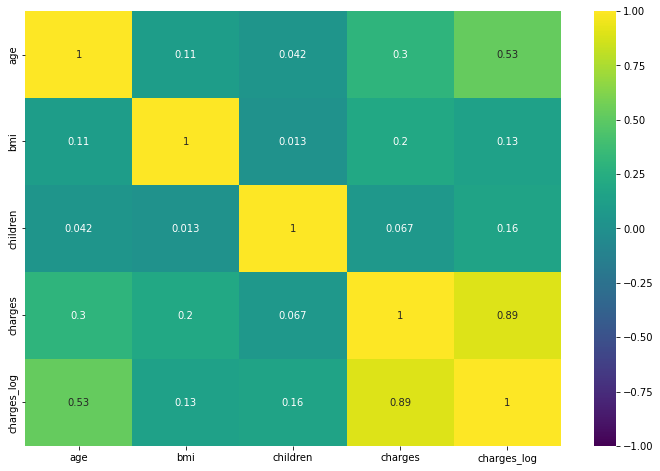

In [191]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

In [192]:
#df_interim.sample(10) esto es de un dataset que no estoy usando

## PASO 4

Probando variable charges sin transformación:

In [193]:
X_train,X_test_aux,y_train, y_test_aux=train_test_split(X,y,test_size=0.3,random_state=412)
print(X_train.shape,y_train.shape)
print(X_test_aux.shape,y_test_aux.shape)

(935, 8) (935,)
(402, 8) (402,)


In [194]:
X_val,X_test,y_val,y_test=train_test_split(X_test_aux,y_test_aux,test_size=0.5,random_state=142)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(935, 8) (935,)
(201, 8) (201,)
(201, 8) (201,)


In [195]:
# estimo modelo
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [196]:
# veo los coeficientes
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -11732.378721808333
Coefficients: 
 [ 2.56835242e+02  3.31667740e+02  6.31800621e+02 -1.63980314e+01
  2.37207687e+04 -3.01661768e+02 -1.27736519e+03 -1.28051106e+03]


In [197]:

#x = sm.add_constant(X) lo saco para entrenar solo sin constante
modelo_mio = sm.OLS(y_train, X_train).fit()

In [198]:
modelo_mio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              820.1
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                        0.00
Time:                        20:26:16   Log-Likelihood:                         -9495.5
No. Observations:                 935   AIC:                                  1.901e+04
Df Residuals:                     927   BIC:                                  1.905e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                201.6574     13.548     14.885      0.000     175.069     228.245
bmi                 62.8438     22.378      2.808      0.005      18.927     106.760
children           455.2370    173.639      2.622      0.009     114.465     796.009
sex_male          -618.0707    406.449     -1.521      0.129   -1415.738     179.596
smoker_yes        2.336e+04    520.395     44.898      0.000    2.23e+04    2.44e+04
region_northwest -1437.2149    568.486     -2.528      0.012   -2552.883    -321.547
region_southeast -1216.4084    597.084     -2.037      0.042   -2388.202     -44.615
region_southwest -2040.4739    583.694     -3.496      0.000   -3185.990    -894.958
==============================================================================
Omnibus:                      189.533   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.748
Skew:                           1.113   Prob(JB):                     7.13e-92
Kurtosis:                       5.412   Cond. No.                         208.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predigo target (charges) según datos de ejemplo

In [199]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
356,46,43.890,3,1,0,0,1,0
1132,52,18.335,0,0,0,1,0,0
178,46,28.900,2,0,0,0,0,1
298,31,34.390,3,1,1,1,0,0
1292,46,25.745,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...
385,19,34.400,0,1,0,0,0,1
273,50,27.455,1,1,0,0,0,0
1242,28,33.110,0,0,0,0,1,0
1258,52,23.180,0,0,0,0,0,0


In [200]:
# ejemplo

edad = 33
sex = 1
bmi = 22
children = 1
smoker = 1
region1 = 0
region2 = 0
region3=0





In [201]:
print('Predicted prima : \n', regr.predict([[edad,bmi,children,sex,smoker,region1,region2,region3]]))

Predicted prima : 
 [28376.04584182]


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [202]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
368,44,32.015,2,1,0,1,0,0
97,55,38.280,0,1,0,0,1,0
775,40,32.300,2,1,0,1,0,0
682,53,24.320,0,1,0,1,0,0
346,33,35.750,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...
641,61,33.915,0,1,0,0,0,0
999,30,22.990,2,1,1,1,0,0
699,21,34.870,0,0,0,0,1,0
597,43,32.600,2,1,0,0,0,1


In [203]:
y_test

368     8116.26885
97     10226.28420
775     6986.69700
682     9863.47180
346     4889.99950
          ...     
641    13143.86485
999    17361.76610
699     2020.55230
597     7441.50100
564     2801.25880
Name: charges, Length: 201, dtype: float64

In [204]:
y_pred = regr.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('RMSE', metrics.mean_squared_error(y_test, y_pred,squared=False))

MAE: 4107.615537819645
MSE: 35879577.370081075
RMSE: 5989.956374639224


In [205]:
print("Modelo con constante")
y_pred = regr.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Modelo sin constante")
y_pred_sin_int = modelo_mio.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_sin_int))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_sin_int))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_sin_int)))

Modelo con constante
MAE: 4107.615537819645
MSE: 35879577.370081075
RMSE: 5989.956374639224
Modelo sin constante
MAE: 4192.538359036042
MSE: 38012074.80691401
RMSE: 6165.393321347309


In [206]:
#  entreno un modelo polinomico en lugar de lineal - cambiando el degree
poly_feature = PolynomialFeatures(degree=2)
x_poly_train = poly_feature.fit_transform(X_train)
x_poly_test = poly_feature.fit_transform(X_test)
modelo5 = regr.fit(x_poly_train, y_train)

In [207]:
y_pred_poly = modelo5.predict(x_poly_test)
print("Modelo de segundo grado")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_poly))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_poly))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Modelo de segundo grado
MAE: 2723.9937635572137
MSE: 22487675.00100372
RMSE: 4742.117143323615


# El modelo de segundo grado es el mejor 

Guardo el mejor modelo con pickle

In [208]:
filename = 'finalized_model.sav'
pickle.dump(modelo5, open("../models/finalized_model.sav", 'wb'))

